# Modeling

###  Notebook Contents:

1. Import the packages that I need.
2. Read in merged_df from datasets.
3. Set my X and Y variables for train_test_split.
4. Create custom stop words and unionize them with English stopwords.
5. Create visualizations
    - Most common words of merged_df
    - Most common words of teenagers_df
    - Most common words of adulting_df
6. Create pipeline for models.
7. Run NaiveBayes model with two transformers.
    - CountVectorizer.
    - TfidfVectorizer.
8. Use best_params_ that will display the best parameters and play with the parameters to get the best possible score.
9. Print out specificty scores using a confusion_matrix.
10. Create a misclassification dataframe.
    - Visualize what rows of data were misclassified.
    - Look for common trends.
11. Create a visualization of the most misclassified words.

In [1]:
# Importing packages that I will need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction import text

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\nolan_fur2pfn\.conda\envs\dsi\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Reading in my merged_dataframe of Teenagers and Adults
merged_df = pd.read_csv('./data/merged_subreddits.csv')
# Visualizing my merged_dataframe
merged_df.head()

,title,selftext,user_post,subreddit,tokenized
0,They say that at least one person has a crush ...,But damn I wish whoever had a crush on me woul...,They say that at least one person has a crush ...,0,"[""they say that at least one person has a crus..."
1,i need to lose 80 pounds immediately,my ass is 220 pounds and 5’6”. im fucking 15. ...,i need to lose 80 pounds immediately my ass is...,0,['i need to lose 80 pounds immediately my ass ...
2,i wanna drink hydrochloric acid,​​​​​ ​​​​​​ ​​​​​​ ​​​​​​​​ ​​​​​​​​​​​​​​​​​...,i wanna drink hydrochloric acid ​​​​​ ​​​​​​ ​...,0,['i wanna drink hydrochloric acid \u200b\u200b...
3,Ask me weirdly personal questions part 3 (seri...,"Idk why I'm doing this, I guess it's fun and l...",Ask me weirdly personal questions part 3 (seri...,0,"[""ask me weirdly personal questions part 3 (se..."
4,"Dear teen boys,",If a girl you have a crush on says she's not i...,"Dear teen boys, If a girl you have a crush on ...",0,"[""dear teen boys, if a girl you have a crush o..."


In [3]:
# Setting my merged_df and which columns I want to look at
merged_df = merged_df[['user_post', 'subreddit']]
# Visualizing my merged_df with the columns I selected
merged_df

,user_post,subreddit
0,They say that at least one person has a crush ...,0
1,i need to lose 80 pounds immediately my ass is...,0
2,i wanna drink hydrochloric acid ​​​​​ ​​​​​​ ​...,0
3,Ask me weirdly personal questions part 3 (seri...,0
4,"Dear teen boys, If a girl you have a crush on ...",0
...,...,...
7476,How to get a car without any help from family ...,1
7477,Has anyone tried HelloFresh or any other food ...,1
7478,Move and find a job or find a job and move fir...,1
7479,How to convince South Asian parents that I nee...,1


In [4]:
# Setting my X variable as user_post
X = merged_df['user_post']
# Setting my y variable as subreddit
y = merged_df['subreddit']

In [5]:
# Check what we need to check in a classification model.
# This is my baseline score that I wish to improve upon
y.value_counts(normalize=True)

0    0.513568
1    0.486432
Name: subreddit, dtype: float64

In [6]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [7]:
# Instantiate a CountVectorizer with the default hyperparameters.
cvec = CountVectorizer()

In [8]:
# Fit the vectorizer on our data.
cvec.fit(X_train)

CountVectorizer()

In [9]:
# Transform user_post
X_train_tf = cvec.transform(X_train)

In [10]:
# Looking at the shape of X_train
X_train.shape

(5610,)

In [11]:
# Getting feature names around the middle of my dataset
cvec.get_feature_names()[5000:5010]

['cube',
 'cubicle',
 'cuck',
 'cucumbers',
 'cuddle',
 'cuddles',
 'cuddling',
 'cul',
 'culinary',
 'cult']

In [12]:
# Transforming test
X_test_tf = cvec.transform(X_test)

In [13]:
# Custom stop words that appear in my dataset.
# This was mostly for removing profanity, darn teenagers.
my_stops = ['cum', 've', 'don', 'just', 'like', 'filler', '0001', 'know', 'want', 'really', 'good', 
            'going', 'feel', 'got','think', 'https', 'gt', 'com', 'im', 'things', 'talk', 'll', 'amp', 
            'way', 'did', 'day', 'make', 'shit' , 'life', 'said', 'new', 'people', 'fucking', 'say', 'wanna',
           'reddit', 'maybe']

# Setting stops variable as english stop words and adding in my unique stops.
stops = text.ENGLISH_STOP_WORDS.union(my_stops)

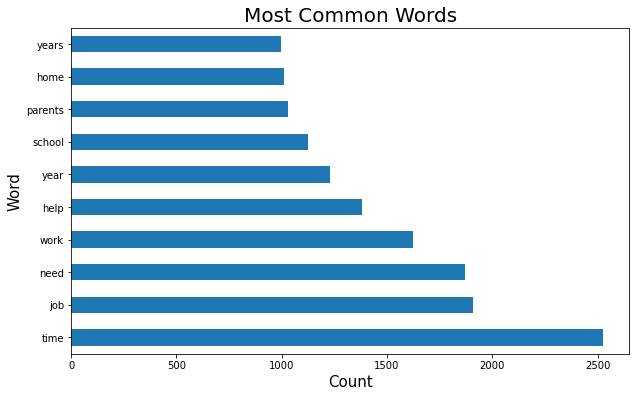

In [14]:
# Setting subreddits_cvec as a countvectorizer of my stopwords
subreddits_cvec = CountVectorizer(stop_words = stops)
# Setting X as user_post
X = merged_df['user_post']
# Fitting subreddits_cvec with user post
subreddits_cvec.fit(X)
# Setting X_trans as my transformed X
X_trans = subreddits_cvec.transform(X)
# Creating a dataframe of X_transformed and using get_feature_names()
X_trans = pd.DataFrame(X_trans.todense(), 
                 columns=subreddits_cvec.get_feature_names())

# Setting figure size
plt.figure(figsize = [10, 6])
# Using .sum() to visualize most common words in descending order
X_trans.sum().sort_values(ascending = False).head(10).plot(kind='barh');

# Setting title for figure
plt.title("Most Common Words", size = 20)
# Labeling my x axis
plt.xlabel("Count", size = 15)
# Labeling my y axis
plt.ylabel("Word", size = 15)

# Saving the figure so that I can use it in my readme.
plt.savefig("./images/overall_common_words.png")

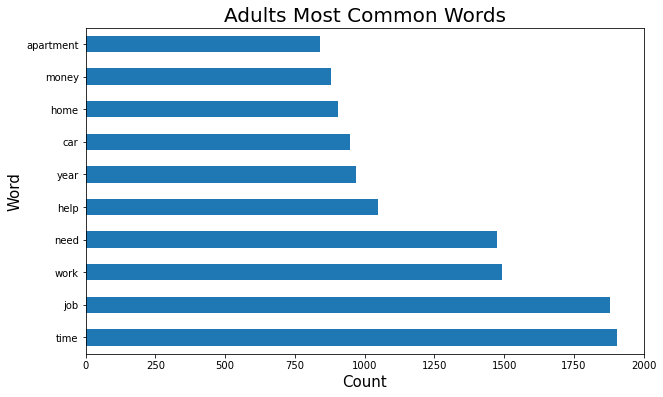

In [15]:
# Reading in the adulting dataframe so that I can visualize top words.
adulting_df = pd.read_csv('./data/adulting_subreddit.csv')

# Setting adulting_cvec to a countvectorizer using my custom stop words
adulting_cvec = CountVectorizer(stop_words = stops)
# Setting X as user_post in adulting dataframe
X = adulting_df['user_post']
# Fitting adulting_cvec with X data (user_post from adults)
adulting_cvec.fit(X)
# Setting X_trans to the cvec of transformed X data
X_trans = adulting_cvec.transform(X)

# Setting X_trans as a dataframe using .todense() and get_feature_names()
X_trans = pd.DataFrame(X_trans.todense(), 
                 columns=adulting_cvec.get_feature_names())

# Setting figure size
plt.figure(figsize = [10, 6])
# Using .sum() on X_trans to visualize common words in descending order
X_trans.sum().sort_values(ascending = False).head(10).plot(kind='barh');

# Setting title for figure
plt.title("Adults Most Common Words", size = 20)
# Setting x axis label
plt.xlabel("Count", size = 15)
# Setting y axis label
plt.ylabel("Word", size = 15)

# Saving figure so that I can use it in my readme
plt.savefig("./images/adults_common_words.png")

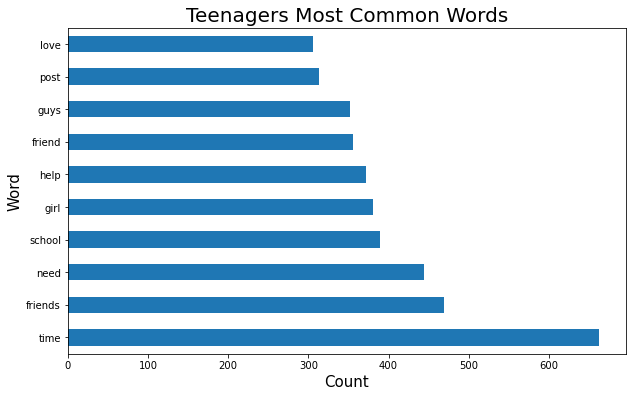

In [16]:
# Reading in my teenagers_dataframe so that I can visualize my most common words in teenagers subreddit
teenagers_df = pd.read_csv('./data/teenagers_subreddit.csv')

# Setting teenagers_cvec as a count vectorizer and using my custom stop words
teenagers_cvec = CountVectorizer(stop_words = stops)
# Setting X as user_post for teenagers dataframe
X = teenagers_df['user_post']
# Fitting teenagers_cvec with X (user_post in teenagers df)
teenagers_cvec.fit(X)
# Setting X trans as transformed X data
X_trans = teenagers_cvec.transform(X)

# Setting X trans as a dataframe using .todense() and get_feature_names()
X_trans = pd.DataFrame(X_trans.todense(), 
                 columns=teenagers_cvec.get_feature_names())

# Setting figure size
plt.figure(figsize = [10, 6])
# Using .sum() on X_trans data to visualize most common words in descending order
X_trans.sum().sort_values(ascending = False).head(10).plot(kind='barh');

# Setting figure title
plt.title("Teenagers Most Common Words", size = 20)
# Setting x axis label
plt.xlabel("Count", size = 15)
# Setting y axis label
plt.ylabel("Word", size = 15)

# Saving figure so that I can use it in my readme
plt.savefig("./images/teenagers_common_words.png")

In [17]:
# Sklearn's stopwords in English language.
print(CountVectorizer(stop_words = 'english').get_stop_words())

frozenset({'that', 'his', 'up', 'well', 'cry', 'with', 'must', 'into', 'about', 'wherever', 'somewhere', 'them', 'him', 'an', 'be', 'formerly', 'however', 'cannot', 'else', 'further', 'when', 'two', 'at', 'hereby', 'amongst', 'three', 'whom', 'sometimes', 'hereupon', 'see', 'had', 'here', 'move', 'thereafter', 'fire', 'your', 'will', 'any', 'anywhere', 'until', 'in', 'was', 'others', 'between', 'hers', 'nine', 'very', 'made', 'fifteen', 'front', 'towards', 'since', 'almost', 'couldnt', 'were', 'thus', 'thin', 'mine', 'not', 'show', 'for', 'call', 'none', 'through', 'six', 'before', 'became', 'found', 'put', 'being', 'you', 'now', 'one', 'back', 'seeming', 'former', 'becoming', 'everyone', 'moreover', 'everywhere', 'eg', 'somehow', 'among', 'yet', 'only', 'hasnt', 'those', 'can', 'go', 'thence', 'its', 'but', 'many', 'namely', 'please', 'alone', 'because', 'seem', 'whoever', 'would', 'there', 'indeed', 'off', 'get', 'nor', 'perhaps', 'from', 'across', 'has', 'twelve', 'whence', 'do', 'a

## Pipeline / Naive Bayes / CountVectorizer

In [18]:
# Setting up of pipeline with countvectorizer and multinomialNB
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Setting up pipe parameters that I will adjust throughout my project to obtain best score.
# Using best_param_ I will see what parameters will work best and remove the ones that do not work.
pipe_params = {
    'cvec__max_features': [5_000],
    'cvec__min_df': [3],
    'cvec__max_df': [.9],
    'cvec__ngram_range': [(1,1)],
    'cvec__stop_words' : [None]
}

In [19]:
# Instantiating GridSearchCV
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5)

In [20]:
# Fitting GridSearch on training data
gs.fit(X_train, y_train)

# Printing of my best parameters that I will fill into my parameters above
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

In [21]:
print("Naive Bayes CountVectorizer Score")
print("_________________________________")
# The best score
print("Best Score:",gs.best_score_)
print("")
# Score model on training set
print("Training Score:", gs.score(X_train, y_train))
print("")
# Score model on testing set
print("Testing Score:", gs.score(X_test, y_test))
print("")
# Estimate how your model will perform on unseen data
print("Cross Val Score:", cross_val_score(pipe, X_train, y_train, cv=3).mean()) 

Naive Bayes CountVectorizer Score
_________________________________
Best Score: 0.9122994652406418

Training Score: 0.9386809269162211

Testing Score: 0.914484233030465

Cross Val Score: 0.8934046345811052


## Pipeline2 / Naive Bayes / TfidfVectorizer

In [22]:
# Instantiate tfidf vectorizer
tvec = TfidfVectorizer()

# Setting up tfidfvectorizer for pipeline
# Using tfidfvectorizer and multinomialNB
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Setting pipeline parameters for my tfidfvectorizer/multinomialNB
# Will also adjust these throughout my project to obtain the best score
pipe_tvec_params = {
    'tvec__max_features': [5_000],
    'tvec__stop_words': [stops],
    'tvec__ngram_range': [(1,2)]
}

In [23]:
# Instantiating GridSearchCV for tfidfvectorizer
gs_tvec = GridSearchCV(pipe_tvec, param_grid=pipe_tvec_params, cv=5)

In [24]:
# Fitting my gridsearch with X_Train and y_train
gs_tvec.fit(X_train, y_train)

# Printing out the best parameters
gs_tvec.best_params_

{'tvec__max_features': 5000,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': frozenset({'0001',
            'a',
            'about',
            'above',
            'across',
            'after',
            'afterwards',
            'again',
            'against',
            'all',
            'almost',
            'alone',
            'along',
            'already',
            'also',
            'although',
            'always',
            'am',
            'among',
            'amongst',
            'amoungst',
            'amount',
            'amp',
            'an',
            'and',
            'another',
            'any',
            'anyhow',
            'anyone',
            'anything',
            'anyway',
            'anywhere',
            'are',
            'around',
            'as',
            'at',
            'back',
            'be',
            'became',
            'because',
            'become',
            'becomes',
            'becoming',
        

In [25]:
print("Naive Bayes TfidfVectorizer Score")
print("_________________________________")
# The best score
print("Best Score:",gs_tvec.best_score_)
print("")
# Score model on training set
print("Training Score:",gs_tvec.score(X_train, y_train))
print("")
# Score model on testing set
print("Testing Score:",gs_tvec.score(X_test, y_test))
print("")
# Estimate how your model will perform on unseen data
print("Cross Val Score:", cross_val_score(pipe_tvec, X_train, y_train, cv=3).mean()) 

Naive Bayes TfidfVectorizer Score
_________________________________
Best Score: 0.9162210338680927

Training Score: 0.9445632798573975

Testing Score: 0.9257081774452165

Cross Val Score: 0.8497326203208556


## Confusion Matrix

In [26]:
# CountVectorizer
preds = gs.predict(X_test)

# Setting truenegative, falsepositive, falsenegative, and truepositive as variables
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

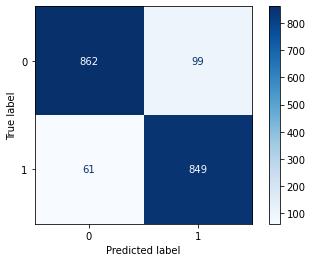

In [27]:
# Printing out confusion matrix.
# In office hours, learned that this is not very valuable for our project.
# More important for health data.
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', values_format='d');

In [28]:
# Calculating specificty by dividing truenegatives by truenegatives + false positives
spec = tn / (tn + fp)

# Print specificity score
print('Specificity:', spec)

Specificity: 0.8969823100936525


In [29]:
# TfidfVectorizer
preds_two = gs_tvec.predict(X_test)

# Setting truenegative, falsepositive, falsenegative, and truepositive as variables
tn, fp, fn, tp = confusion_matrix(y_test, preds_two).ravel()

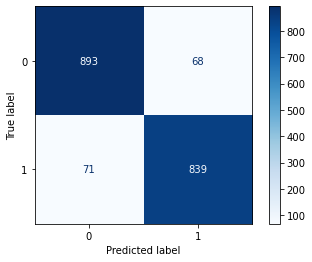

In [30]:
# Printing out confusion matrix.
# In office hours, learned that this is not very valuable for our project.
# More important for health data.
plot_confusion_matrix(gs_tvec, X_test, y_test, cmap='Blues', values_format='d');

In [31]:
# Calculating specificty by dividing truenegatives by truenegatives + false positives
spec = tn / (tn + fp)

# Print specificity score
print('Specificity:', spec)

Specificity: 0.9292403746097815


# Misclassification

In [32]:
# Creating dataframe from y_test data
misclass_df = pd.DataFrame(data = y_test)

# Renaming subrddit column to actual_subreddit, easier to read and see misclassifications
misclass_df = misclass_df.rename({'subreddit' : 'actual_subreddit'}, axis = 1)

# Setting a new column, predicted_subreddit, as my predictions
misclass_df['predicted_subreddit'] = preds

# Setting a new column mislcass that wil subtract the actual_subreddit from the predicted subreddit
misclass_df['misclass'] = misclass_df['actual_subreddit'] - misclass_df['predicted_subreddit']

# Brining in the whole_post column from X_test
misclass_df['whole_post'] = X_test

# Mapping actual subreddit, 1 for Adults, 0 for Teenagers. Easier to read
misclass_df["actual_subreddit"] = misclass_df["actual_subreddit"].map({1:"Adulting", 0:"Teenagers"})

# Mapping predicted subreddit, 1 or Adults, 0 for Teenagers. Easier to read.
misclass_df["predicted_subreddit"] = misclass_df["predicted_subreddit"].map({1:"Adulting", 0:"Teenagers"})

# Mapping Misclass, 1 for Yes, 0 for No. Easier to read.
misclass_df["misclass"] = misclass_df["misclass"].map({1:"Yes", 0:"No"})

# Setting misclass_df where misclass was not 0
misclass_df = misclass_df[misclass_df['misclass'] != 0]

# Visualizing first ten rows in misclass_DF
misclass_df[0:10]

,actual_subreddit,predicted_subreddit,misclass,whole_post
2492,Teenagers,Teenagers,No,Posting pics of Hugo everyday to cheer you up ...
7011,Adulting,Teenagers,Yes,Games to play with no alcohol? I hope this is ...
180,Teenagers,Teenagers,No,Click here for another surprise! \n&gt;!\n⣿⣿⣿⣿...
4332,Adulting,Adulting,No,I have a nearly one-hour drive one way to my n...
6378,Adulting,Adulting,No,Adults do their taxes! Anyone used the free si...
959,Teenagers,Teenagers,No,"Just asked out my crush and she said yes, what..."
860,Teenagers,Teenagers,No,Free award for anyone that can make me laugh! ...
5279,Adulting,Adulting,No,Im confused! I’m a 17 turning 18 on May. I hav...
6348,Adulting,Adulting,No,"I am older, 44. I quit my ""good"" professional ..."
2539,Teenagers,Teenagers,No,My crush just confessed to me kin the smoothes...


In [33]:
# New df where the misclassification was TRUE
df_y_test_misclass = misclass_df[misclass_df['misclass'] == 'Yes']
# Visualizing where there were misclassifications
df_y_test_misclass

,actual_subreddit,predicted_subreddit,misclass,whole_post
7011,Adulting,Teenagers,Yes,Games to play with no alcohol? I hope this is ...
7396,Adulting,Teenagers,Yes,Navigated workplace conlict Hooray! I navigate...
4904,Adulting,Teenagers,Yes,"Dreams do come true, I’ve seen friends start t..."
7374,Adulting,Teenagers,Yes,Make eye contact with people while you talk to...
6757,Adulting,Teenagers,Yes,Something i learned If you need something sewe...
...,...,...,...,...
6678,Adulting,Teenagers,Yes,One of my students asked me out. I am very pro...
4028,Adulting,Teenagers,Yes,How do you keep going after realising you are ...
4053,Adulting,Teenagers,Yes,[OPINION/RANT]How to indirectly teach my famil...
4912,Adulting,Teenagers,Yes,I gave my cat her medicine with no assistance ...


In [34]:
# Using EDA to try and find any points where Teenagers was misclassified. NONE!
df_y_test_misclass[df_y_test_misclass['actual_subreddit'] == 'Teenagers']

,actual_subreddit,predicted_subreddit,misclass,whole_post


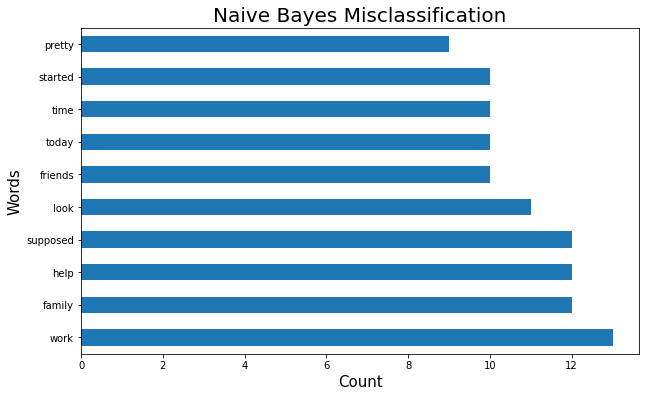

In [35]:
# Setting misclass_cvec as a countvectorizer of my custom stop words
misclass_cvec = CountVectorizer(stop_words = stops)
# Setting X as column whole_post from df_y_test
X = df_y_test_misclass['whole_post']
# Fitting X on misclass_cvec
misclass_cvec.fit(X)
# Setting X_trans as transformed X
X_trans = misclass_cvec.transform(X)

# Using X_trans to create a dataframe using .todense() and get_feature_names()
X_trans = pd.DataFrame(X_trans.todense(), 
                 columns=misclass_cvec.get_feature_names())

# Setting figure size
plt.figure(figsize = [10, 6])
# Using .sum() to visualize most common words in descending order
X_trans.sum().sort_values(ascending = False).head(10).plot(kind='barh');

# Setting title for figure
plt.title("Naive Bayes Misclassification", size=20);
# Setting label for X axis
plt.xlabel("Count", size = 15);
# Setting label for y axis
plt.ylabel("Words", size = 15);

# Saving figure so that I can use it in my readme.
plt.savefig("./images/misclassified_naivebayes.png")